In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
#This dataset is the BART ridership from August 2nd to August 19th 2021 (18 days)
bart = pd.read_csv('2021_bart.csv')
bart.head()

,date,Hour,Start_station,End_station,Passengers
0,2/8/2021,2,DUBL,DUBL,1
1,2/8/2021,3,EMBR,EMBR,1
2,2/8/2021,4,16TH,DUBL,1
3,2/8/2021,4,24TH,24TH,1
4,2/8/2021,4,ANTC,CIVC,1


In [79]:
# setting the 4 downtown stations as the start staion
sf_downtown = bart[bart['Start_station'].isin(['CIVC','EMBR','MONT','POWL'])]

In [80]:
def pass_per_hour(start, end): #enter each arguments in square brackets ['a', 'b']
    bart_start = bart[bart['Start_station'].isin(start)]
    bart_direction_end = bart_start[bart_start['End_station'].isin(end)]
    hourly_passengers = bart_direction_end.groupby(['date', 'Hour'])['Passengers'].sum().groupby('Hour').mean()
    return hourly_passengers

In [81]:
def pass_per_hour_all(start): #enter each arguments in square brackets ['a', 'b']
    bart_start = bart[bart['Start_station'].isin(start)]
    hourly_passengers = bart_start.groupby(['date', 'Hour'])['Passengers'].sum().groupby('Hour').mean()
    return hourly_passengers

In [82]:
start = ['CIVC','EMBR','MONT','POWL']
downtown_all = pass_per_hour_all(start)
print(downtown_all)
total_downtown = np.sum(np.array(downtown_all))
total_downtown

Hour
2        1.000000
3        1.285714
4        3.200000
5       40.666667
6      116.916667
7      240.083333
8      333.833333
9      287.166667
10     280.500000
11     331.000000
12     418.333333
13     492.416667
14     750.083333
15    1166.250000
16    1572.000000
17    2042.666667
18    1473.583333
19     844.250000
20     447.583333
21     260.666667
22      71.500000
23       2.100000
Name: Passengers, dtype: float64


11177.085714285715

## Finding the Arrival rate 

In [83]:
#Red line northbound from downtown
start = ['CIVC','EMBR','MONT','POWL']
end = ['ASHB', 'DBRK', 'NBRK', 'DELN', 'PLZA', 'RICH']
downtown_northbound_red = pass_per_hour(start, end)
print(downtown_northbound_red)

df_red_north = downtown_northbound_red.to_frame().reset_index()
df_red_north

Hour
5       5.222222
6      12.000000
7      31.400000
8      45.416667
9      34.000000
10     31.833333
11     35.916667
12     49.416667
13     56.750000
14     80.666667
15    152.333333
16    191.250000
17    252.166667
18    210.583333
19    111.333333
20     70.833333
21     27.750000
22     11.166667
Name: Passengers, dtype: float64


,Hour,Passengers
0,5,5.222222
1,6,12.000000
2,7,31.400000
3,8,45.416667
4,9,34.000000
5,10,31.833333
6,11,35.916667
7,12,49.416667
8,13,56.750000
9,14,80.666667


In [84]:
#yellow line northbound from downtown
start = ['CIVC','EMBR','MONT','POWL']
end = ['ROCK', 'ORIN', 'LAFY', 'WCRK', 'PHIL', 'CONC', 'NCON', 'PITT', 'PCTR', 'ANTC']
downtown_northbound_yellow = pass_per_hour(start, end)
print(downtown_northbound_yellow)

df_yellow_north = downtown_northbound_yellow.to_frame().reset_index()
df_yellow_north

Hour
5       2.250000
6       7.111111
7      17.636364
8      29.500000
9      27.416667
10     23.250000
11     29.166667
12     34.833333
13     44.916667
14     73.666667
15    171.583333
16    269.166667
17    332.750000
18    276.333333
19    146.250000
20     87.083333
21     47.166667
22     14.750000
23      1.800000
Name: Passengers, dtype: float64


,Hour,Passengers
0,5,2.250000
1,6,7.111111
2,7,17.636364
3,8,29.500000
4,9,27.416667
5,10,23.250000
6,11,29.166667
7,12,34.833333
8,13,44.916667
9,14,73.666667


In [85]:
#lines going east (blue/green) - northbound from downtown
start = ['CIVC','EMBR','MONT','POWL']
end = ['LAKE', 'FTVL', 'COLS', 'SANL', 'BAYF', 'CAST', 'WDUB', 'DUBL', 'HAYW', 'SHAY', 'UCTY', 'FRMT', 'WARM', 'MLPT', 'BERY']
downtown_northbound_bluegreen = pass_per_hour(start, end)
print(downtown_northbound_bluegreen)

df_bluegreen_north = downtown_northbound_bluegreen.to_frame().reset_index()
df_bluegreen_north

Hour
5       4.222222
6      36.444444
7      57.090909
8      75.166667
9      59.500000
10     53.500000
11     63.000000
12     84.500000
13    112.416667
14    176.166667
15    305.333333
16    424.916667
17    563.250000
18    389.416667
19    243.833333
20    121.416667
21     78.500000
22     10.500000
23      1.000000
Name: Passengers, dtype: float64


,Hour,Passengers
0,5,4.222222
1,6,36.444444
2,7,57.090909
3,8,75.166667
4,9,59.500000
5,10,53.500000
6,11,63.000000
7,12,84.500000
8,13,112.416667
9,14,176.166667


In [86]:
#southbound all line
start = ['CIVC','EMBR','MONT','POWL']
end = ['16TH', '24TH', 'GLEN', 'BALB', 'DALY', 'COLM', 'SSAN', 'SBRN', 'SFIA']
downtown_southbound = pass_per_hour(start, end)
print(downtown_southbound)

df_south = downtown_southbound.to_frame().reset_index()
df_south

Hour
4       1.000000
5      12.333333
6      49.000000
7      87.333333
8      98.833333
9      88.916667
10     97.500000
11    124.250000
12    149.500000
13    176.416667
14    265.166667
15    331.083333
16    432.083333
17    578.500000
18    370.083333
19    211.166667
20    105.333333
21     63.833333
22     30.583333
23      1.666667
Name: Passengers, dtype: float64


,Hour,Passengers
0,4,1.000000
1,5,12.333333
2,6,49.000000
3,7,87.333333
4,8,98.833333
5,9,88.916667
6,10,97.500000
7,11,124.250000
8,12,149.500000
9,13,176.416667


In [87]:
df_bluegreen_north = downtown_northbound_bluegreen.to_frame().reset_index()
df_bluegreen_north

,Hour,Passengers
0,5,4.222222
1,6,36.444444
2,7,57.090909
3,8,75.166667
4,9,59.500000
5,10,53.500000
6,11,63.000000
7,12,84.500000
8,13,112.416667
9,14,176.166667


In [88]:
df_south = downtown_southbound.to_frame().reset_index()
df_south

,Hour,Passengers
0,4,1.000000
1,5,12.333333
2,6,49.000000
3,7,87.333333
4,8,98.833333
5,9,88.916667
6,10,97.500000
7,11,124.250000
8,12,149.500000
9,13,176.416667


### Finding lambda

In [89]:
%matplotlib inline

[ 1.55834232e-03 -1.15723483e-01  3.33303288e+00 -4.72787934e+01
  3.47011276e+02 -1.24227164e+03  1.69580541e+03]
          6          5         4         3       2
0.001558 x - 0.1157 x + 3.333 x - 47.28 x + 347 x - 1242 x + 1696


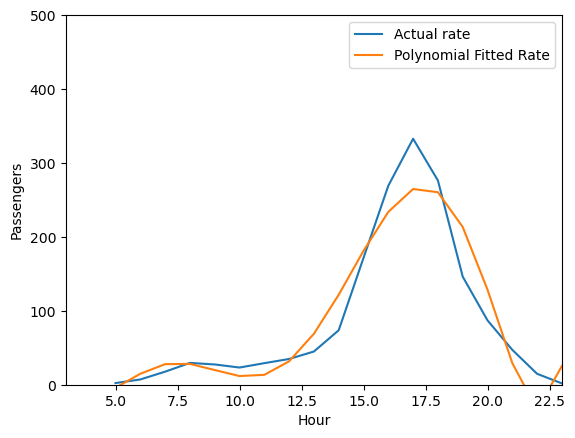

In [90]:
#df_yellow_north
X = df_yellow_north['Hour'].to_numpy()
Y = df_yellow_north['Passengers'].to_numpy()

plt.plot(X,Y, label='Actual rate')
plt.xlabel('Hour')
plt.ylabel('Passengers')

coeffs = np.polyfit(X, Y, 6)
print(coeffs)
print(np.poly1d(coeffs))

coeff_1 = np.poly1d(coeffs)
coeff_1

plt.plot(X, coeff_1(X), label='Polynomial Fitted Rate')
plt.ylim(0,500)
plt.xlim(3,23)
plt.xlabel('Hour')
plt.ylabel('Passengers')
plt.legend()
plt.show()

[ 1.15714068e-02 -8.06627948e-01  2.10683391e+01 -2.55633416e+02
  1.44133883e+03 -2.99754625e+03]
         5          4         3         2
0.01157 x - 0.8066 x + 21.07 x - 255.6 x + 1441 x - 2998


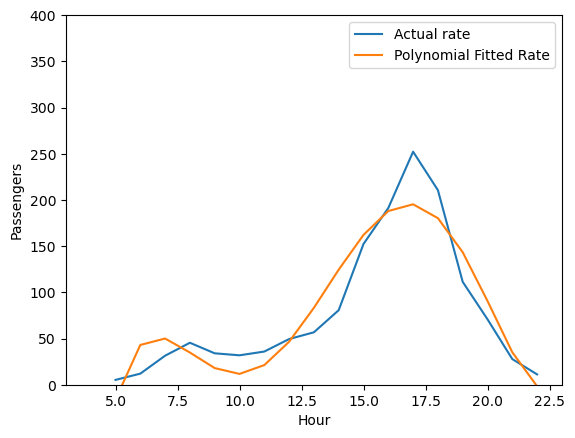

In [91]:
#df_red_north
X = df_red_north['Hour'].to_numpy()
Y = df_red_north['Passengers'].to_numpy()

plt.plot(X,Y, label='Actual rate')
plt.xlabel('Hour')
plt.ylabel('Passengers')

coeffs = np.polyfit(X, Y, 5)
print(coeffs)
print(np.poly1d(coeffs))

coeff_1 = np.poly1d(coeffs)
coeff_1

plt.plot(X, coeff_1(X), label='Polynomial Fitted Rate')
plt.ylim(0,400)
plt.xlim(3,23)
plt.xlabel('Hour')
plt.ylabel('Passengers')
plt.legend()
plt.show()

[ 2.48312865e-02 -1.72919013e+00  4.50811140e+01 -5.45320654e+02
  3.06044020e+03 -6.33404702e+03]
         5         4         3         2
0.02483 x - 1.729 x + 45.08 x - 545.3 x + 3060 x - 6334


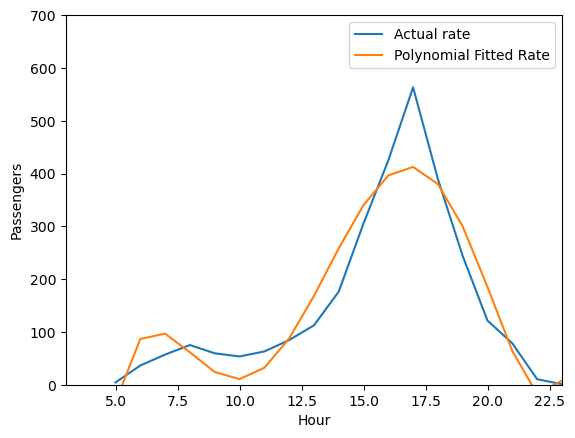

In [92]:
#df_bluegreen_north
X = df_bluegreen_north['Hour'].to_numpy()
Y = df_bluegreen_north['Passengers'].to_numpy()

plt.plot(X,Y, label='Actual rate')
plt.xlabel('Hour')
plt.ylabel('Passengers')

coeffs = np.polyfit(X, Y, 5)
print(coeffs)
print(np.poly1d(coeffs))

coeff_1 = np.poly1d(coeffs)
coeff_1

plt.plot(X, coeff_1(X), label='Polynomial Fitted Rate')
plt.ylim(0,700)
plt.xlim(3,23)
plt.xlabel('Hour')
plt.ylabel('Passengers')
plt.legend()
plt.show()

[ 1.62853962e-02 -1.09105856e+00  2.69891106e+01 -3.04749116e+02
  1.57789951e+03 -2.94415483e+03]
         5         4         3         2
0.01629 x - 1.091 x + 26.99 x - 304.7 x + 1578 x - 2944


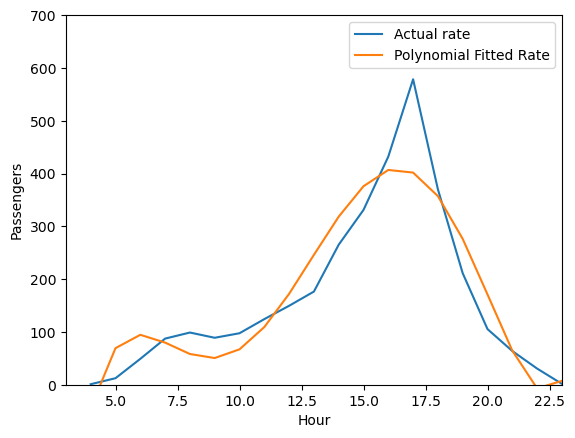

In [93]:
#df_south
X = df_south['Hour'].to_numpy()
Y = df_south['Passengers'].to_numpy()

plt.plot(X,Y, label='Actual rate')
plt.xlabel('Hour')
plt.ylabel('Passengers')

coeffs = np.polyfit(X, Y, 5)
print(coeffs)
print(np.poly1d(coeffs))

coeff_1 = np.poly1d(coeffs)
coeff_1

plt.plot(X, coeff_1(X), label='Polynomial Fitted Rate')
plt.ylim(0,700)
plt.xlim(3,23)
plt.xlabel('Hour')
plt.ylabel('Passengers')
plt.legend()
plt.show()